In [4]:
import pandas as pd
import requests
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
x = requests.get('https://api.covidtracking.com/v1/us/daily.csv')

In [6]:
data_state = pd.read_csv('https://api.covidtracking.com/v1/states/ca/daily.csv')

In [7]:
death = pd.DataFrame(data_state['deathIncrease'])
date = pd.DataFrame(data_state['date'])
death.size

369

In [8]:
def get_average_new_deaths(state_name):
    data_state = pd.read_csv('https://api.covidtracking.com/v1/states/' + state_name +'/daily.csv')
    death = pd.DataFrame(data_state['deathIncrease'])
    days = []
    for i in range(death.size, 0, -1):
        days.append(i)

    death.insert(0, 'days', days)
    average_sum = 0
    for i in range(0, death['deathIncrease'].size):
        average_sum += death['deathIncrease'][i];
    
    return (average_sum/death.size)
    

In [9]:

days = []
for i in range(death.size, 0, -1):
    days.append(i)

death.insert(0, 'days', days)

<AxesSubplot:xlabel='days', ylabel='deathIncrease'>

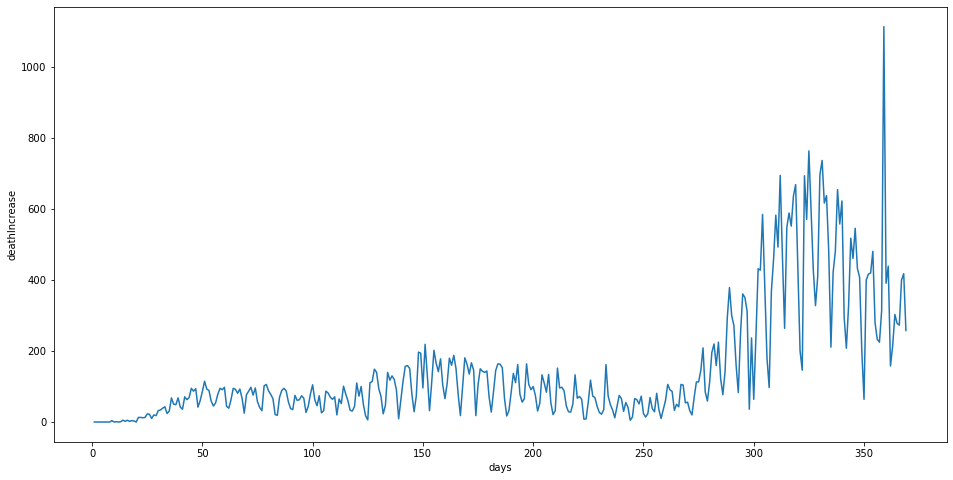

In [10]:
f = plt.figure(figsize=(16,8))
sb.lineplot(data = death, x ='days', y ='deathIncrease')

In [11]:
death['deathIncrease'].size
average_sum = 0
for i in range(0, death['deathIncrease'].size):
    average_sum += death['deathIncrease'][i];
    
print(average_sum/death.size)

73.33875338753387


In [12]:
state_names = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')

In [13]:
state_names = state_names[0]

In [14]:
state_names = state_names.iloc[:,[0,1]]

In [15]:
state_names = state_names['Flag, name andpostal abbreviation[12]']

In [16]:
state_names = state_names.set_index('Flag, name andpostal abbreviation[12]')

In [17]:
state_names = state_names.to_dict()['Flag, name andpostal abbreviation[12].1']

In [18]:
removal_list = []
for key,value in state_names.items():
    state_names[key] = value.lower()
    if(key[-1] == ']'):
        removal_list.append(key)
        

In [19]:
for i in removal_list:
    value = state_names[i]
    state_names.pop(i)
    state_names[i[:-3]] = value

In [20]:
state_names

{'Alabama': 'al',
 'Alaska': 'ak',
 'Arizona': 'az',
 'Arkansas': 'ar',
 'California': 'ca',
 'Colorado': 'co',
 'Connecticut': 'ct',
 'Delaware': 'de',
 'Florida': 'fl',
 'Georgia': 'ga',
 'Hawaii': 'hi',
 'Idaho': 'id',
 'Illinois': 'il',
 'Indiana': 'in',
 'Iowa': 'ia',
 'Kansas': 'ks',
 'Louisiana': 'la',
 'Maine': 'me',
 'Maryland': 'md',
 'Michigan': 'mi',
 'Minnesota': 'mn',
 'Mississippi': 'ms',
 'Missouri': 'mo',
 'Montana': 'mt',
 'Nebraska': 'ne',
 'Nevada': 'nv',
 'New Hampshire': 'nh',
 'New Jersey': 'nj',
 'New Mexico': 'nm',
 'New York': 'ny',
 'North Carolina': 'nc',
 'North Dakota': 'nd',
 'Ohio': 'oh',
 'Oklahoma': 'ok',
 'Oregon': 'or',
 'Rhode Island': 'ri',
 'South Carolina': 'sc',
 'South Dakota': 'sd',
 'Tennessee': 'tn',
 'Texas': 'tx',
 'Utah': 'ut',
 'Vermont': 'vt',
 'Washington': 'wa',
 'West Virginia': 'wv',
 'Wisconsin': 'wi',
 'Wyoming': 'wy',
 'Kentucky': 'ky',
 'Massachusetts': 'ma',
 'Pennsylvania': 'pa',
 'Virginia': 'va'}

In [21]:
get_average_new_deaths(state_names['Alabama'])

13.863387978142077

In [22]:
average_death_dict = {}
for name in state_names.keys():
    average_deaths = get_average_new_deaths(state_names[name])
    average_death_dict[name] = average_deaths
    print(name)
    
    

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Louisiana
Maine
Maryland
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Washington
West Virginia
Wisconsin
Wyoming
Kentucky
Massachusetts
Pennsylvania
Virginia


In [23]:
population_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population')

In [26]:
population_data = population_data[0]

KeyError: 0

In [27]:
population_data = population_data.iloc[:,[2,3]]

IndexError: positional indexers are out-of-bounds

In [23]:
population_data = list(population_data.set_index('State or territory').to_dict().values())[0]


In [24]:
for i in average_death_dict.keys():
    average_death_dict[i] = int(average_death_dict[i])/int(population_data[(i,)])

In [25]:
for i in average_death_dict.keys():
    average_death_dict[i] = average_death_dict[i]*1000000

In [26]:
average_death_dict

{'Alabama': 2.6414539212586647,
 'Alaska': 0.0,
 'Arizona': 2.9643998484922185,
 'Arkansas': 2.309833091460811,
 'California': 1.8542942330077685,
 'Colorado': 1.3774771127873093,
 'Connecticut': 2.8113531436269716,
 'Delaware': 2.026734656858622,
 'Florida': 1.7944802890604066,
 'Georgia': 2.2408928015707166,
 'Hawaii': 0.0,
 'Idaho': 1.0947428804765198,
 'Illinois': 2.4627548057482285,
 'Indiana': 2.368632320609781,
 'Iowa': 2.212696388658224,
 'Kansas': 2.059163190398808,
 'Louisiana': 2.7985167000407722,
 'Maine': 0.0,
 'Maryland': 1.6513089430598953,
 'Michigan': 2.2073825910758536,
 'Minnesota': 1.4140916352591022,
 'Mississippi': 3.033585840030255,
 'Missouri': 1.7881677912616467,
 'Montana': 0.9254315055752621,
 'Nebraska': 1.0322303607851557,
 'Nevada': 1.9118880882680493,
 'New Hampshire': 0.7319170737955389,
 'New Jersey': 3.377476576918483,
 'New Mexico': 2.373809475202949,
 'New York': 2.6891763135695426,
 'North Carolina': 1.4149844780919367,
 'North Dakota': 2.6133235072

In [57]:
state_data = pd.DataFrame.from_dict(average_death_dict, orient='index')

In [58]:
race_data = pd.read_csv('Ethnicity Data.csv')
race_data

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total,Diversity by Simpson Index
0,United States,0.601,0.122,0.185,0.056,0.007,0.002,0.028,1,0.414283
1,Alabama,0.654,0.265,0.044,0.014,0.004,NaN,0.019,1,0.500450
2,Alaska,0.600,0.022,0.070,0.060,0.151,0.015,0.083,1,0.398899
3,Arizona,0.542,0.043,0.318,0.033,0.039,0.002,0.024,1,0.399927
4,Arkansas,0.721,0.152,0.078,0.016,0.006,0.004,0.024,1,0.549913
5,California,0.364,0.053,0.395,0.147,0.004,0.004,0.033,1,0.314060
6,Colorado,0.678,0.038,0.218,0.032,0.005,0.001,0.028,1,0.510486
7,Connecticut,0.657,0.100,0.169,0.046,0.002,NaN,0.026,1,0.473006
8,Delaware,0.614,0.218,0.097,0.039,0.003,NaN,0.028,1,0.436243
9,District of Columbia,0.367,0.450,0.112,0.037,0.003,NaN,0.031,1,0.352072


In [59]:
race_data = race_data.set_index('Location')

In [60]:
race_data = race_data.iloc[:,[8]]

In [61]:
race_data

,Diversity by Simpson Index
Location,
United States,0.414283
Alabama,0.500450
Alaska,0.398899
Arizona,0.399927
Arkansas,0.549913
California,0.314060
Colorado,0.510486
Connecticut,0.473006
Delaware,0.436243


In [62]:
combined_data = state_data.merge(race_data, left_index = True, right_index = True)
combined_data

,0,Diversity by Simpson Index
Alabama,13.863388,0.500450
Alaska,0.415531,0.398899
Arizona,22.124661,0.399927
Arkansas,7.246594,0.549913
California,73.338753,0.314060
Colorado,8.115176,0.510486
Connecticut,10.327078,0.473006
Delaware,2.006812,0.436243
Florida,39.933168,0.375466
Georgia,24.262873,0.380284


In [68]:
combined_data = combined_data.rename(columns={0:'deaths'})

In [69]:
combined_data

,deaths,Diversity by Simpson Index
Alabama,13.863388,0.500450
Alaska,0.415531,0.398899
Arizona,22.124661,0.399927
Arkansas,7.246594,0.549913
California,73.338753,0.314060
Colorado,8.115176,0.510486
Connecticut,10.327078,0.473006
Delaware,2.006812,0.436243
Florida,39.933168,0.375466
Georgia,24.262873,0.380284


<AxesSubplot:xlabel='Diversity by Simpson Index', ylabel='deaths'>

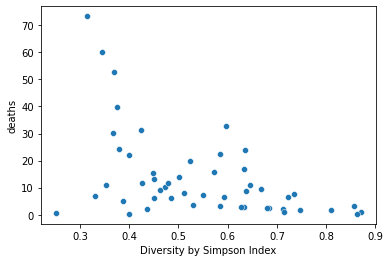

In [72]:
sb.scatterplot(data=combined_data,x = 'Diversity by Simpson Index' ,y = 'deaths')

In [73]:
combined_data.corr()

,deaths,Diversity by Simpson Index
deaths,1.000000,-0.483718
Diversity by Simpson Index,-0.483718,1.000000
